# EDA for JB Chorales Piano Data Set

In Mondays class (so we didn't have much time to dive deep here) we talked about the JB Chorales piano dataset. It is a cool dataset to really jump into the possibilities of NLP because 1. its not a spoken language and 2. Its input data is audio data! We wanted to take a little bit of time here to make sure we are confident uploading and extracting audio data. Using the Mido documentation, we have done so. Then, we plot trends in the Chorales test piano dataset. 

####  Reading in audio data:

In [1]:
#!pip install mido==1.2.9
import mido
from mido import MidiFile

mid = MidiFile('./sample_data/10.mid', clip=True)
print(mid)

<midi file './sample_data/10.mid' type 0, 1 tracks, 236 messages>


#### Parsing through "tracks" within the data:

In [2]:
for track in mid.tracks:
    print(track)

<midi track '' 236 messages>


#### Pulling out the guts of the data in each track: 

In [3]:
count=0
for msg in mid.tracks[0]:
    if count==0:
      firstMSG=msg
    count=count+1
    print(msg)

program_change channel=0 program=0 time=0
note_on channel=0 note=60 velocity=90 time=0
note_on channel=0 note=63 velocity=90 time=0
note_on channel=0 note=67 velocity=90 time=0
note_on channel=0 note=72 velocity=90 time=0
note_off channel=0 note=60 velocity=0 time=120
note_off channel=0 note=63 velocity=0 time=120
note_on channel=0 note=60 velocity=90 time=0
note_on channel=0 note=75 velocity=90 time=0
note_off channel=0 note=60 velocity=0 time=120
note_on channel=0 note=56 velocity=90 time=0
note_off channel=0 note=56 velocity=0 time=120
note_off channel=0 note=67 velocity=0 time=0
note_off channel=0 note=75 velocity=0 time=0
note_on channel=0 note=53 velocity=90 time=0
note_on channel=0 note=68 velocity=90 time=0
note_on channel=0 note=77 velocity=90 time=0
note_off channel=0 note=53 velocity=0 time=120
note_off channel=0 note=68 velocity=0 time=0
note_off channel=0 note=72 velocity=0 time=0
note_on channel=0 note=50 velocity=90 time=0
note_on channel=0 note=70 velocity=90 time=0
not

In [4]:
endMSG=msg #save the end message here for parsing. 

At this stage we have one song uploaded into our variable mid. We will parse through the tracks here and plot the trends in the internal values of the data from this one song.

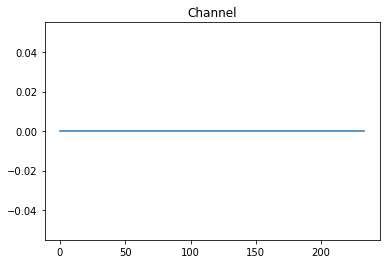

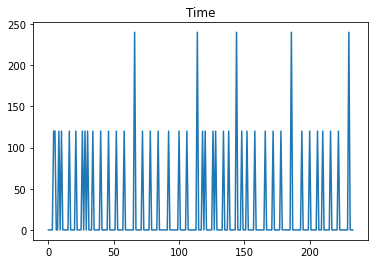

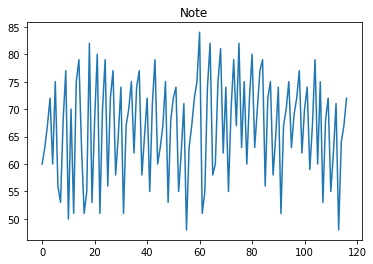

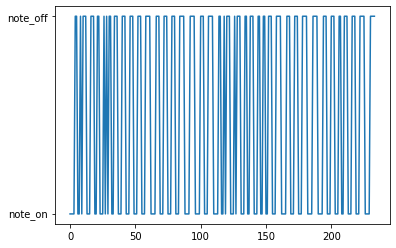

In [5]:
import matplotlib.pyplot as plt
note_on=[]
channel=[]
note=[]
velocity=[]
program=[]
time=[]
for msg in mid.tracks[0]:
  if (msg != endMSG and msg != firstMSG): 
    note_on.append(msg.type)
    channel.append(msg.channel)
    if not msg.is_meta:
      if msg.type == 'note_on':
        note.append(msg.note)
    #velocity.append(msg.velocity)
    time.append(msg.time)

plt.plot(channel)
plt.title('Channel')
plt.show()
plt.plot(time)
plt.title('Time')
plt.show()
plt.plot(note)
plt.title('Note')
plt.show()
plt.plot(note_on)
plt.show()

Now that we have plotted one song, we can see how these variables behave, but we are still left questioning how much these trends change song to song. Therefore we will now iterate through every song in our test dataset and visualize the trends through histogram plots.

In [6]:
import os

directory = './sample_data'
note_on=[]
channel=[]
note=[]
velocity=[]
program=[]
time=[]
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        mid = MidiFile(f, clip=True)
        count=0
        for msg in mid.tracks[0]:
            if count==0:
                firstMSG=msg
            count=count+1
        endMSG=msg #save the end message here for parsing. 
        for msg in mid.tracks[0]:
          if (msg != endMSG and msg != firstMSG): 
            note_on.append(msg.type)
            channel.append(msg.channel)
            if not msg.is_meta:
              if msg.type == 'note_on':
                note.append(msg.note)
            if(msg.velocity):
              velocity.append(msg.velocity)
            time.append(msg.time)

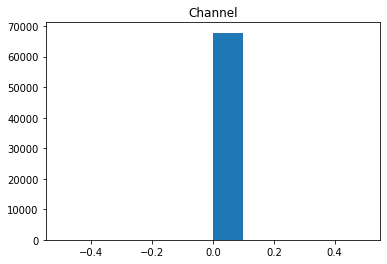

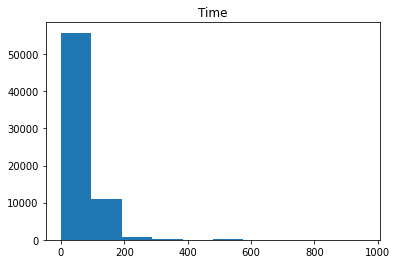

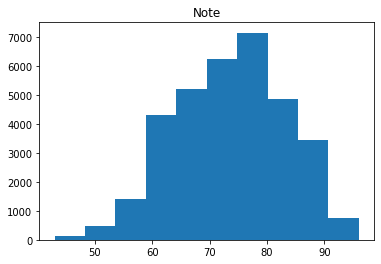

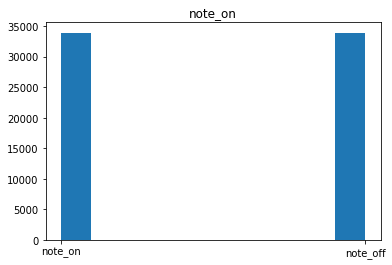

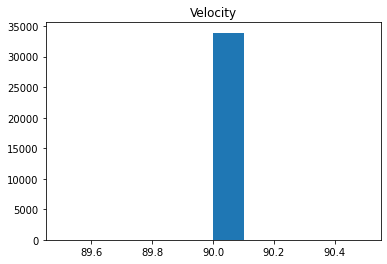

In [7]:
plt.hist(channel)
plt.title('Channel')
plt.show()
plt.hist(time)
plt.title('Time')
plt.show()
plt.hist(note)
plt.title('Note')
plt.show()
plt.hist(note_on)
plt.title('note_on')
plt.show()

plt.hist(velocity)
plt.title('Velocity')
plt.show()

We see some informational distributions here. We notice that note on is just as frequent as note off, note seems to be nearly normally distributed, and time is skewed heavily right. We quickly can fit the most interesting distributions below.

,sumsquare_error,aic,bic,kl_div
beta,0.004151,9003.776933,-1.126586e+06,inf
gamma,0.004940,1975.043365,-1.114798e+06,inf
norm,0.006809,9386.272091,-1.093044e+06,inf
burr,0.007309,2106.082650,-1.088212e+06,inf
lognorm,0.007612,14400.026369,-1.085473e+06,inf


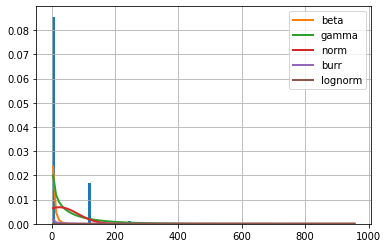

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
#!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(time,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()



,sumsquare_error,aic,bic,kl_div
beta,0.086734,944.490716,-436679.416664,inf
norm,0.087708,917.530163,-436321.377216,inf
lognorm,0.087768,921.885058,-436287.989733,inf
gamma,0.087855,924.964449,-436254.342623,inf
burr,0.088692,897.486357,-435922.259324,inf


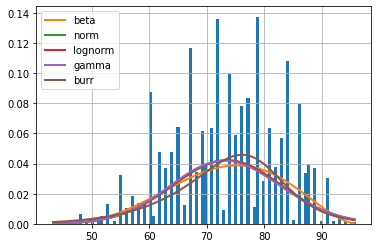

In [12]:

f = Fitter(note,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

Overall we are very excited to start working with audio here. Being able to work with audio data and turn it into values that the computer can measure and interpret opens plenty of posibilities such as speach to text, verbal conversation, etc. We also are excited to have this into to the piano dataset because we might very well be using it next report.
